In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib

suiciderate_df = pd.read_csv(r"C:\Users\arhum\OneDrive - Borough of Manhattan Community College\Python3.0\nteract\Data Science Workshop\suiciderates.csv")

In [2]:
suiciderate_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#years = suiciderate_df["age"].str.replace("years", "")
suiciderate_df["age"]= suiciderate_df["age"].str.replace("years","").str.replace("+","") 
new = suiciderate_df["age"].str.split("-", n=1, expand = True)

suiciderate_df["age_min"]= new[0]
suiciderate_df["age_min"]= pd.to_numeric(suiciderate_df["age_min"])

suiciderate_df["age_max"]= new[1]
suiciderate_df["age_max"]= pd.to_numeric(suiciderate_df["age_max"])

columns = suiciderate_df.columns

suiciderate_df.drop(columns=["age"], inplace = True)
suiciderate_df.drop(columns=["country-year"], inplace = True)
suiciderate_df.drop(columns=["HDI for year"], inplace = True)
suiciderate_df.drop(columns=[" gdp_for_year ($) "], inplace = True)

suiciderate_df.rename(columns={"gdp_per_capita ($)" : "gdp_household"}, inplace=True)

suiciderate_df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_household,generation,age_min,age_max
0,Albania,1987,male,21,312900,6.71,796,Generation X,15,24.0
1,Albania,1987,male,16,308000,5.19,796,Silent,35,54.0
2,Albania,1987,female,14,289700,4.83,796,Generation X,15,24.0
3,Albania,1987,male,1,21800,4.59,796,G.I. Generation,75,NaN
4,Albania,1987,male,9,274300,3.28,796,Boomers,25,34.0


f, ax = plt.subplots(figsize=(25,10))

sns.boxplot(x="country", y="suicides/100k pop", data=suiciderate_df, hue="sex", color="b")

In [4]:
suiciderate_df_5 = suiciderate_df[suiciderate_df.year.apply(lambda x: str(x).endswith("5"))] 
suiciderate_df_5 = suiciderate_df_5.groupby(["country", "year", "sex"], as_index=False).sum()
suiciderate_df_5.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_household,age_min,age_max
0,Albania,1995,female,34,1473800,16.06,5010,210,200.0
1,Albania,1995,male,54,1429600,24.49,5010,210,200.0
2,Albania,2005,female,0,1399928,0.00,17586,210,200.0
3,Albania,2005,male,0,1383392,0.00,17586,210,200.0
4,Antigua and Barbuda,1985,female,0,32292,0.00,23100,210,200.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

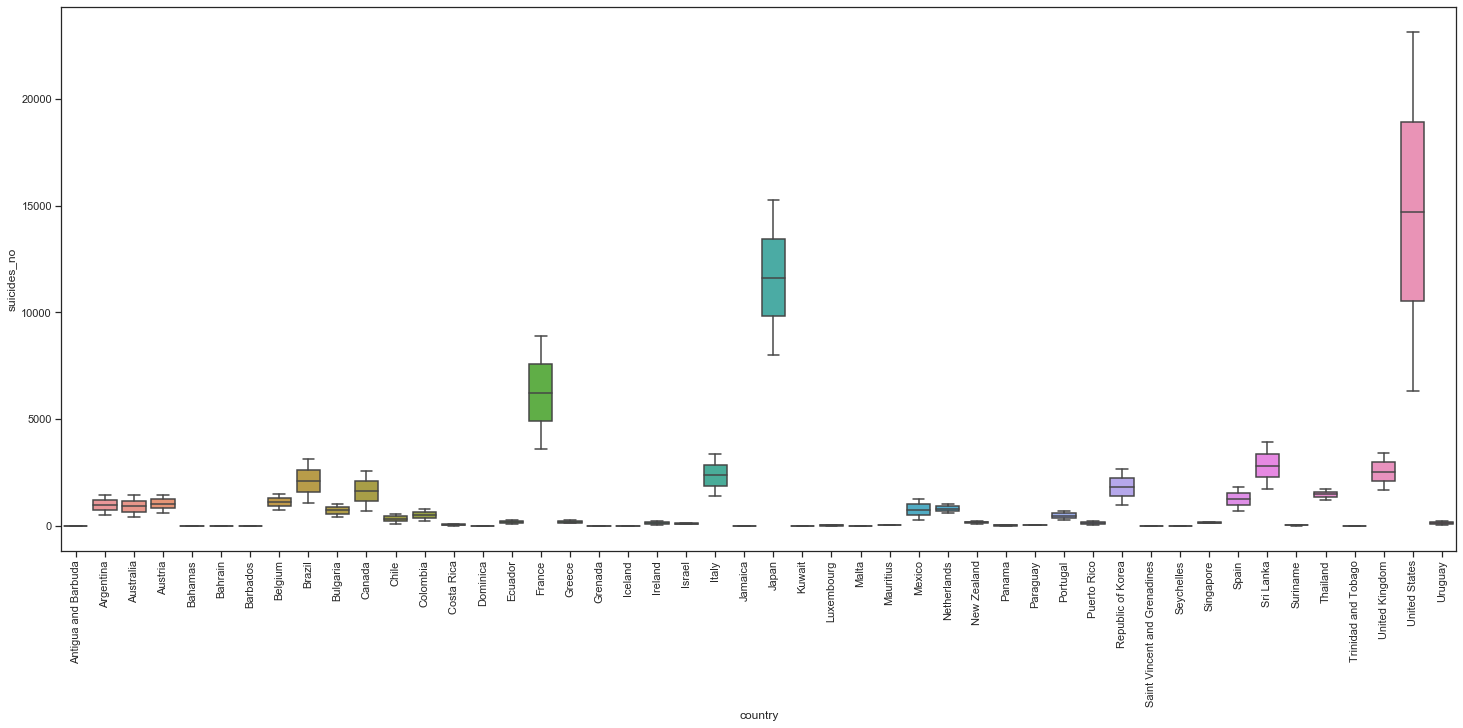

In [5]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(25,10))

#gender = suiciderate_df_5.index.get_level_values(1)
#suiciderate_df_5.groupby("

#grid = sns.FacetGrid(suiciderate_df_5, col="year", hue="sex", palette="tab20c", col_wrap=1, height=15.5)
sns.boxplot(data=suiciderate_df_5.query("year==1985"), x="country", y="suicides_no")
#sns.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xticks(rotation=90)

#grid.fig.tight_layout(w_pad=1)

#grid.map(plt.bar, "suicides/100k pop", "country")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

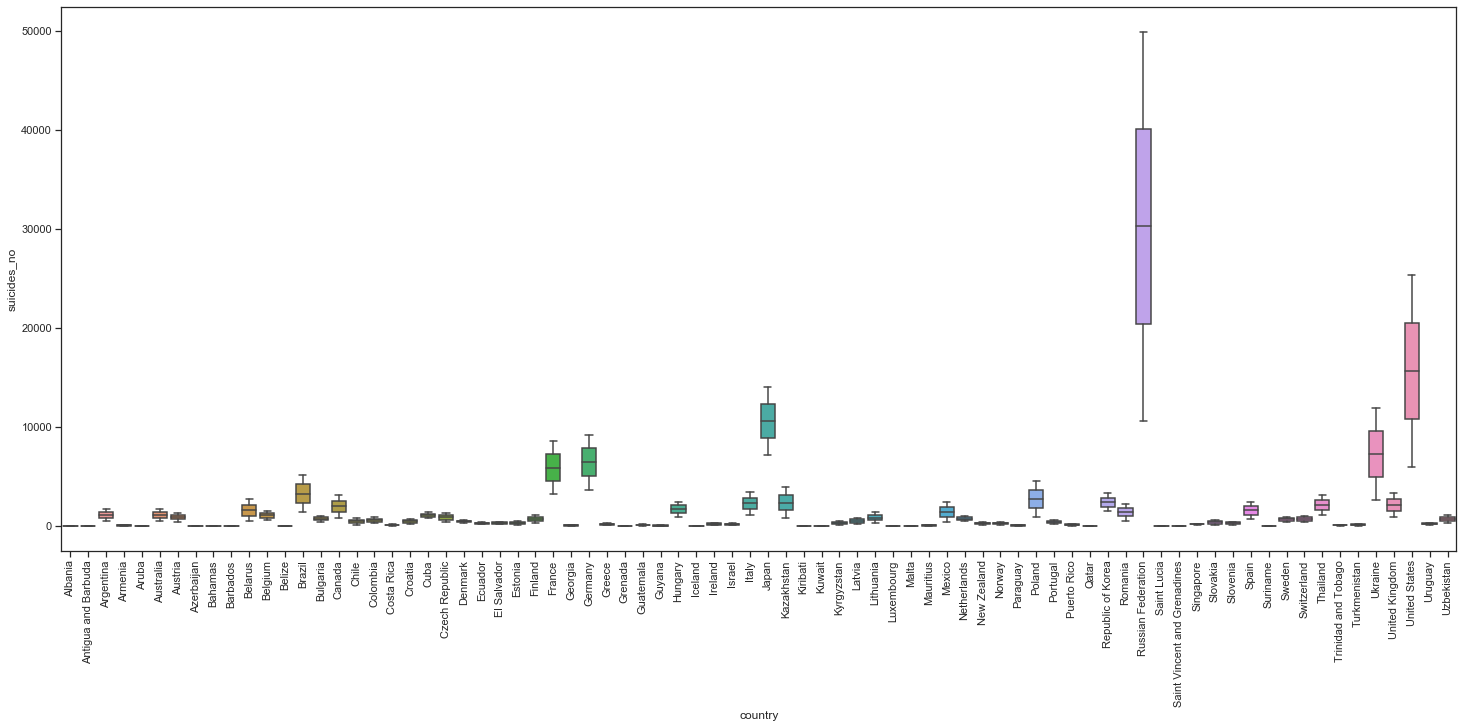

In [6]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(25,10))

sns.boxplot(data=suiciderate_df_5.query("year==1995"), x="country", y="suicides_no")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text xticklabel objects>)

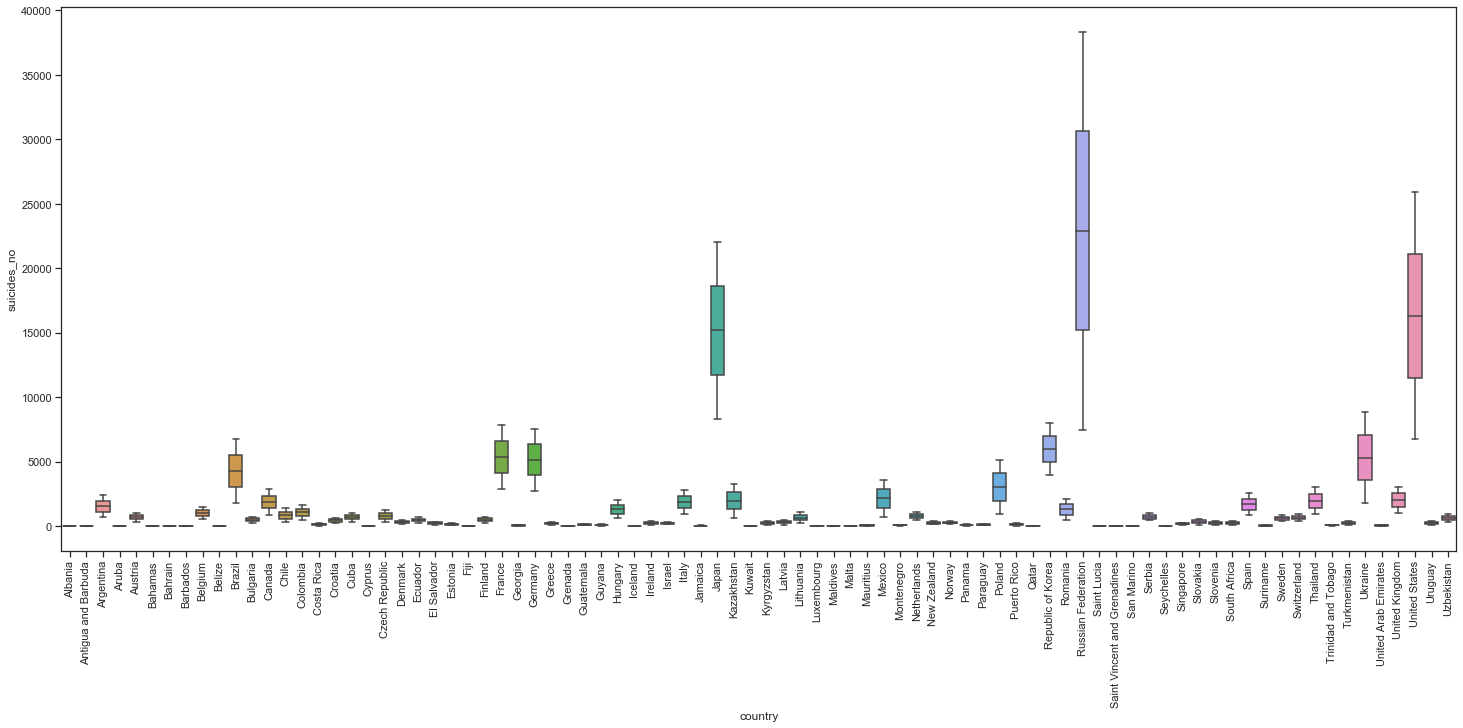

In [7]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(25,10))

sns.boxplot(data=suiciderate_df_5.query("year==2005"), x="country", y="suicides_no")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

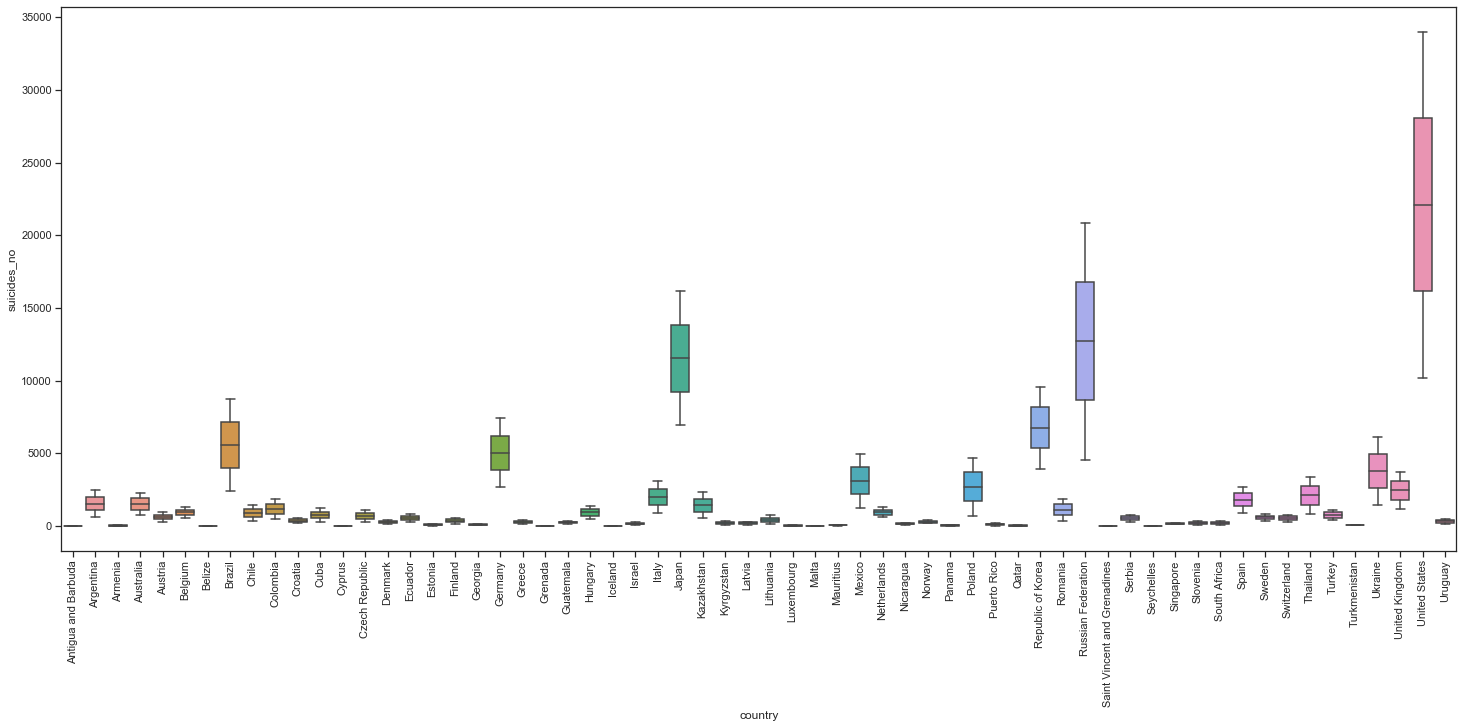

In [8]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(25,10))

sns.boxplot(data=suiciderate_df_5.query("year==2015"), x="country", y="suicides_no")
plt.xticks(rotation=90)